# Projekt MSP1
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 22. 10. 2023 v IS VUT. Kontrola bude probíhat na Pythonu 3.10.12; neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Jméno a login autora_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi. Není dovoleno načítat jiné knihovny.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Z logu vás budou nejvíce zajímat řádky
```
Configuration: config6
Run: 191
Time of run: 53.298725254089774
```

Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou je to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

In [2]:
# TODO nacteni dat ze zip souboru

def load_logfile(f) -> dict:
    """Load a logfile from a file-like object and return a dict with the data."""
    data = {
        "conf": None,
        "run": None,
        "time": np.nan
    }

    for cnt, line in enumerate(f):
        line = line.decode("utf-8")
        if(cnt == 0):
            data["conf"] = line.split(" ")[1][:-1]
        elif(cnt == 1):
            data["run"] = int(line.split(" ")[1][:-1])
        elif(cnt == 2):
            data["time"] = float(line.split(" ")[3][:-1])
        elif(cnt == 3):
            data["status"] = line.split(" ")[1][:-1]
        else:
            cnt = 0
        # TODO vase naplneni slovniku data
    return data

data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        with zf.open(filename, "r") as f:
            data.append(load_logfile(f))
df = pd.DataFrame(data)
df

,conf,run,time,status
0,config1,0,104.967142,SUCCESS
1,config1,1,98.617357,SUCCESS
2,config1,2,106.476885,SUCCESS
3,config1,3,115.230299,SUCCESS
4,config1,4,97.658466,SUCCESS
...,...,...,...,...
1195,config6,195,168.809495,SUCCESS
1196,config6,196,159.607244,SUCCESS
1197,config6,197,171.049799,SUCCESS
1198,config6,198,164.478283,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. 

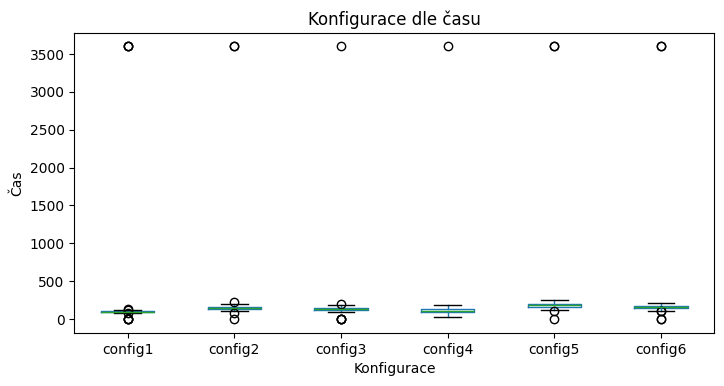

In [3]:
df = pd.DataFrame(data)

df.boxplot(column="time",by="conf", grid=False, figsize=(8,4))
plt.title('Konfigurace dle času')
plt.xlabel('Konfigurace')
plt.ylabel('Čas')
plt.suptitle('')
plt.show()


__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů?_


Jedná se o jednotlivé běhy algoritmů, které skončily chybou. Tyto hodnoty lze na grafu vidět jako tzv "outliery", což jsou kolečka, která se nachází na hodnotách 3500 a 0 na ose času.
 
 

Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

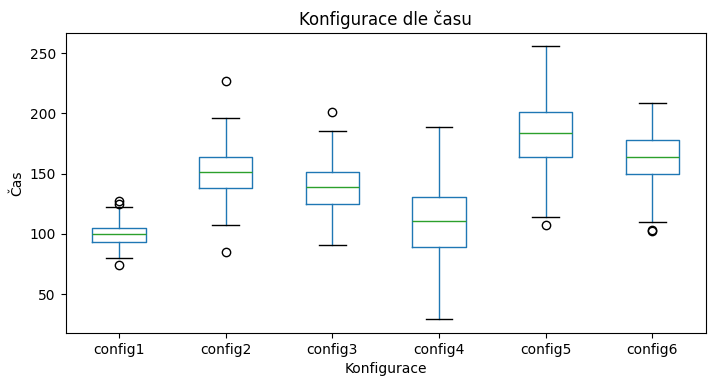

In [4]:
# TODO kod pro upravu dataframe tak, že tam tyto hodnoty nebudou:

indexError = df[(df["status"] != "SUCCESS")].index
df.drop(indexError, inplace=True)

df.boxplot(column="time",by="conf", grid=False, figsize=(8,4))
plt.title('Konfigurace dle času')
plt.xlabel('Konfigurace')
plt.ylabel('Čas')
plt.suptitle('')
plt.show()

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry času pro jednotlivé konfigurace.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [5]:
# TODO deskriptivni parametry

df.groupby("conf")["time"].describe(percentiles=[.25, .5, .75])


,count,mean,std,min,25%,50%,75%,max
conf,,,,,,,,
config1,193.0,99.590413,9.386788,73.802549,92.979469,99.865028,104.824724,127.201692
config2,197.0,151.732975,19.833198,85.174653,137.995662,151.516091,163.802880,227.054630
config3,195.0,138.616959,19.867428,90.567110,124.803901,138.678404,151.536291,201.577616
config4,199.0,110.317016,30.656816,29.093401,88.742158,110.782732,130.665606,188.971462
config5,197.0,183.659767,28.729836,107.283620,164.070091,183.843132,201.250693,255.807973
config6,196.0,162.829359,20.648193,102.074892,149.917475,163.990098,177.730865,208.795048


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._


V tabulce se nachází přehledný statistický popis délek běhů rozdělený dle jednotlivých konfigurací algoritmu.

U každé z těchto konfigurací se nachází následující hodnoty:
<ol>
<li>count: počet jednotlivých záznamů běhů pro danou konfiguraci. Na základě této hodnoty lze například určit kolik konfigurací bylo z původních 200 chybných.</li>
<li>mean: střední hodnota časů běhů konfigurací algoritmu. Na základě této hodnoty a odchylky lze zhruba porovnat, které konfigurace dopadly nejlépe z hlediska času. </li>
<li>std: směrodatná odchylka časů běhů konfigurací algoritmu. Díky této hodnotě je možné určit rozptyl a variabilitu dat.  </li>
<li>min: minimální hodnota.</li> 
<li>hodnoty 25%, 50%, 75%: tyto hodnoty udávají hranici pod kterou leží 25%, 50%, 75% hodnot u jednotlivých konfigurací. Jinak se tyto hodnoty mohou také nazývat jako dolní kvartyl, druhý kvartil(medián) a horní kvartyl.</li>
<li>max: maximální hodnota.</li>
</ol>

Z těchto hodnot lze vyčíst, že nejméně chybných běhů bylo ve 4. konfiguraci. Nejdelší nechybný běh se nacházel v 5. konfiguracia trval 255,807973. Nejkratší běh trval 29,093401 a nacházel se ve 4. konfiguraci. Nejlepší průměrnou hodnotu běhu měla konfigurace 1. Tato konfigurace má také zároveň nemenší rozptyl.
 

## Vizualizace
Vizualizujte časy běhů algoritmů v jednom kompaktním grafu tak, aby byl zřejmý i rozptyl hodnot. Zvolte vhodný graf, který pak níže komentujte.

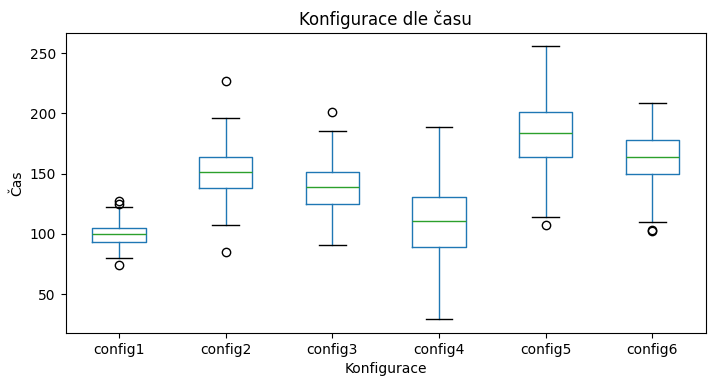

In [6]:
# TODO graf

df.boxplot(by="conf",column="time", grid=False, figsize=(8,4))
plt.title('Konfigurace dle času')
plt.xlabel('Konfigurace')
plt.ylabel('Čas')
plt.suptitle('')
plt.show()


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

V grafu je možné nalézt následující:
<ol>
<li>střední hodnoty jednotlivých běhů znázorněné vodorovnými čárami v obedelnících.</li>
<li>rozdíly dolníhích a horníhích kvartylů, které jsou reprezenotvány výškami obdelínků </li>
<li>časy jednotlivých běhů nezahrnuté mezi rozpětím znázorněné tečkami.</li>
<li>Spodní svislé čáry vedoucí z obdelníků, které se vypočítají následovně: (spodní kvartyl - 1,5 * (spodní kvartyl - horní kvartyl)). Jejich délku je možné nastavit pomocí parametru "whis=", kterým je možné místo základních hodnot kvartylů (25%, 75%) nastavit jiné.</li>
<li>Horní svislé čáry vedoucí z obdelníků, které se vypočítají následovně: (horní kvartyl + 1,5 * (spodní kvartyl - horní kvartyl)).</li>
</ol>

Mimo zmíněné body je možné díky této reprezentaci zhruba porovnat, jak si které algoritmy vedly(na základě výšky střední hodnoty a délek svislých čar). Pro přesnější porovnání je ovšem nutné provést test hypotéz. 

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. Můžete i přidat další buňky.

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet studentova rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Text(0, 0.5, 'Čas')

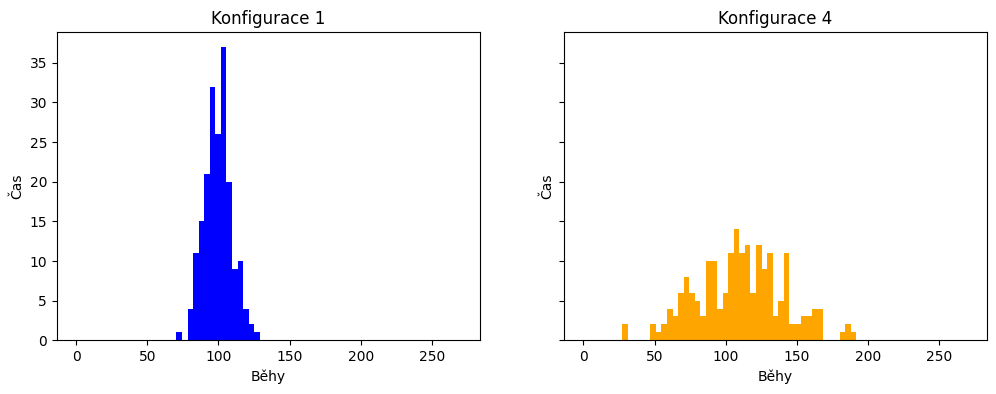

In [7]:
gb = df.groupby("conf") 
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot the histogram for Group1 in the first subplot
axs[0].hist(gb[["time"]].get_group("config1"), bins=np.linspace(0, 270, 70), color='blue')
axs[0].set_title('Konfigurace 1')
axs[0].set_xlabel('Běhy')
axs[0].set_ylabel('Čas')

# Plot the histogram for Group2 in the second subplot
axs[1].hist(gb[["time"]].get_group("config4"), bins=np.linspace(0, 270, 70), color='orange')
axs[1].set_title('Konfigurace 4')
axs[1].set_xlabel('Běhy')
axs[1].set_ylabel('Čas')


Na základě střední hodnoty je možné odhadnout, že si nejlépe vedly konfigurace 1 a 4. Tudíž budeme zkoumat právě tyto dvě konfigurace.

Data všech konfigurací mají normální rozložení (zobrazení dat v hisogramu má zvonový tvar), střední hodnota časů běhů skupiny config1 je 99.590413 s rozptylem 88.1117889569. u skupiny config4 je střední hodnota 110.317016 a rozptyl 939.840367258.
Pro testování hypotéz je potřeba využít něpárový t-test pro data s různým rozptylem - Welchův t-test.


Nulová hypotéza říka, že se střední hodnoty obou konfigurací se rovnají. Alternativní říká, ze střední hodnota 1. konfigurace je menší než střední hodnota 4. konfigurace.

Variabilita obou těchto konfigurací se vyýznamně liší, konfigurace 4 má časy běhů mnohem více rozptýlené než konfigurace 1. Poloha obou konfigurací je podobná, jelikož střední hodnoty jsou si podobné a hodnoty spodního a vrchního kvartilu taky.


In [8]:
# TODO: Implementace s vyuzitim knihovni funkce
alpha = 0.05

x = stats.ttest_ind(gb[["time"]].get_group("config1"), gb[["time"]].get_group("config4"), alternative='less', equal_var=False)
pVal = x[1]
if(pVal <= alpha): print("Zamítáme nulovou hypotézu. Platí Alternativní hypotéza")
else: print("Nelze zamítnout nulovou hypotézu. Nelze prokázat platnost alternativní hypotézy")


Zamítáme nulovou hypotézu. Platí Alternativní hypotéza


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

Z provedeného testu bylo možné určit, že platnost alternativní hypotézy naznačuje existenci statisticky významného rozdílu ve prospěch menšího průměrného času 1. konfigurace ve srovnání s průměrným časem 4. konfigurace. Tento závěr bylo možné určit na základě vypočítané hodnoty p, která byla menší než určená hodnota významnosti alpha.


In [9]:
# TODO vlastni implementace zvoleneho testu


def my_ttest(group1, group2):
    mean1, std1, count1 = group1.agg(["mean", "std", "count"]).values[0:3]
    mean2, std2, count2 = group2.agg(["mean", "std", "count"]).values[0:3]
    
    #https://real-statistics.com/students-t-distribution/two-independent-samples-t-test/two-sample-t-test-uequal-variances/
    
    t =     (
                (mean1 - mean2) / 
                np.sqrt(
                    ((np.square(std1) / count1))
                    +
                    ((np.square(std2) / count2))
                ) 
            )

    df =   (
                (np.square((np.square(std1) / count1) + (np.square(std2) / count2)))  / 
                (   
                    np.square((np.square(std1) / count1)) / 
                    (count1 - 1)
                    + 
                    np.square((np.square(std2) / count2)) / 
                    (count2 - 1) 
                ) 
            )

    pVal = stats.t.cdf(t, df) 
    if(pVal <= alpha): print("Zamítáme nulovou hypotézu. Platí Alternativní hypotéza")
    else: print("Nelze zamítnout nulovou hypotézu. Nelze prokázat platnost alternativní hypotézy")


my_ttest(gb[["time"]].get_group("config1"), gb[["time"]].get_group("config4"))



Zamítáme nulovou hypotézu. Platí Alternativní hypotéza
